**Scenario 1**: Interaction among people is always the same

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import math as m

Data

In [2]:
#We choose to convert the .csv file to .xls format and use pandas to parse it:
data = pd.ExcelFile("COVID19_Data_Spain_ex.xls")
sheetX = data.parse(0) 
date = sheetX['Date']
infected = sheetX['Infected']
deaths = sheetX['Deaths']
recovered = sheetX['Recovered']
dt = np.linspace(1,len(infected),len(infected))
a = (1/2.3)
ro = (1/5.2)

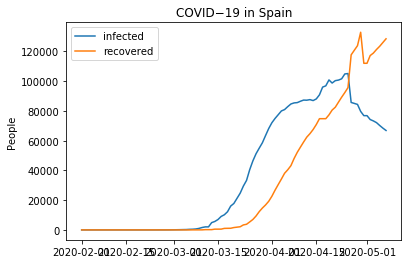

In [3]:
#Plotting real data:
plt.figure(1)
plt.plot(date,infected,label='infected')
plt.plot(date,recovered,label='recovered')
plt.title('COVID−19 in Spain')
plt.ylabel('People')
plt.legend(loc = 'best')
plt.show()

**Scenario Nº 1**

SEIR MODEL

In [5]:
#Caso SEIR model fitting
def SEIR(I_cond,dt,r):
    S0,I0,R0,E0 = I_cond
    dsdt = -r*S0*I0
    dedt = r*S0*I0 -(1/5.2)*E0
    didt = (1/5.2)*E0 -(1/2.3)*I0
    drdt = (1/2.3)*I0
    return dsdt,dedt,didt,drdt

def evolution_SEIR(t,r,S0):
    return odeint(SEIR,[S0,1,0,1],t,args =(r,))[:,2]

In [6]:
params_SEIR,params_covariance_SEIR = curve_fit(evolution_SEIR,dt,infected,[0.7e-6,1.1e6]) 
r_value_SEIR = params_SEIR[0]
S0_value_SEIR = params_SEIR[1]
print('The value for r is equal to (SEIR):',r_value_SEIR)
print('The value for the initial susceptible population is (SEIR):',S0_value_SEIR)

The value for r is equal to (SEIR): 7e-07
The value for the initial susceptible population is (SEIR): 1100000.0


/Applications/anaconda/lib/python3.6/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Applications/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:766: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/Applications/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [7]:
#R0<1 and the end of the epidemic:
fit_SEIR = evolution_SEIR(dt,r_value_SEIR,S0_value_SEIR)
maximumE = max(fit_SEIR)
tmaxE = np.where(fit_SEIR==maximumE)
print('R_0<1:'+str(tmaxE[0]))

dt_extended = np.linspace(1,300,300)
fit_SEIR_extended = evolution_SEIR(dt_extended,r_value_SEIR,S0_value_SEIR)


fin_SEIR = 0
contE = 0
for individualE in fit_SEIR:
    if individualE < 1:
        fin_SEIR = contE + 2 #0-indexing
        break 
    else: 
        contE = contE+1
print('No more people will get infected after '+str(fin_SEIR)+' days of epidemic.')

R_0<1:[60]
No more people will get infected after 2 days of epidemic.


/Applications/anaconda/lib/python3.6/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


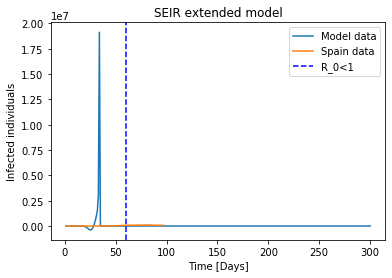

In [8]:
#Representación del resutlado:
plt.figure(1)
plt.plot(dt_extended,fit_SEIR_extended,label='Model data')
plt.plot(dt,infected,label='Spain data')
plt.axvline(60,color='blue',linestyle= 'dashed',label='R_0<1')

plt.xlabel('Time [Days]')
plt.ylabel('Infected individuals')
plt.title('SEIR extended model')
plt.legend(loc='best')
plt.show()